In [1]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt
import random as rng

sift = cv.SIFT_create()
bf = cv.BFMatcher()

In [2]:
def getData(img1, img2):
    kp1, d1 = sift.detectAndCompute(img1,None)#key points and detectors
    kp2, d2 = sift.detectAndCompute(img2,None)#key points and detectors
    matches = bf.knnMatch(d1,d2,k=2)#matcher
    pl = []#points left
    pr = []#pounts Right
    
    #lowes ratio
    for m,n in matches:
        if(m.distance < 0.75*n.distance):
            pr.append(kp2[m.trainIdx].pt)
            pl.append(kp1[m.queryIdx].pt)
    pr = np.int32(pr)
    pl = np.int32(pl)
    F, mask = cv.findFundamentalMat(pr,pl,cv.FM_LMEDS)
    pr = pr[mask.ravel()==1]
    pl = pl[mask.ravel()==1]
    return F, pr, pl

In [3]:
def imgRect(img1,img2,p1,p2,F,imgSize):
    print(imgSize)
    res,h1,h2 = cv.stereoRectifyUncalibrated(p1,p2,F,imgSize)
    if res:
#         ret1 = cv.warpPerspective(img1, h1, imgSize) #When using the matrix alone the results are very poor after lots of 
#         ret2 = cv.warpPerspective(img2, h2, imgSize)# research I found the best way to fix the issue was to add the code seen below
        ret1 = cv.warpPerspective(img1, np.linalg.inv(np.mat(h1)) * np.mat(h2), imgSize)
        ret2 = cv.warpPerspective(img2, np.linalg.inv(np.mat(h2)) * np.mat(h1), imgSize)
    else:
        print("error")
    return ret1,ret2

In [4]:
def calcDispMap(img1,img2,numD,bs):
    stereo = cv.StereoBM_create(numD, bs)
    disp = stereo.compute(img1, img2).astype(np.float32)/16
    disp = disp/numD
    return disp

In [5]:
img1 = cv.imread("tape_l.jpg")
img2 = cv.imread("tape_r.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'img l')

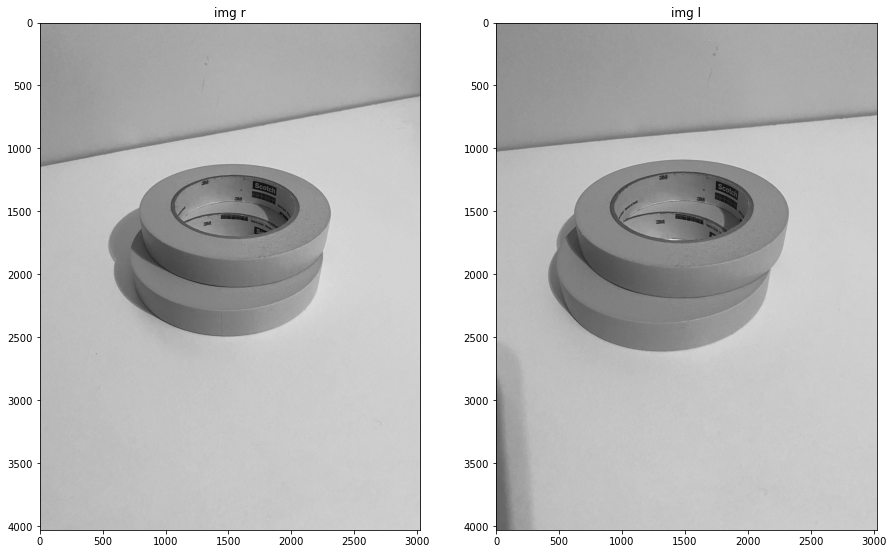

In [6]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("img r")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("img l")

(3024, 4032)


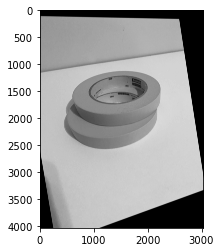

In [7]:
F,inlier1,inlier2 = getData(img1,img2)
out1,out2 = imgRect(img1,img2,inlier1,inlier2,F,(img1.shape[1],img1.shape[0]))
plt.imshow(out2,cmap='gray')

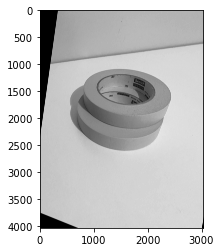

In [8]:
plt.imshow(out1,cmap='gray')

numDisparities = 32
blockSize = 5


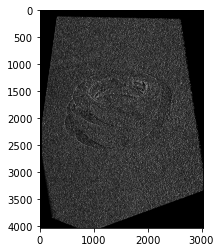

In [9]:
nm = 2
b=0
print("numDisparities = "+str(nm*16))
print("blockSize = "+ str(5+(2*b)))
disp = calcDispMap(out1,out2,16*nm,5+(2*b))
plt.imshow(disp,cmap='gray')

In [10]:
img1 = cv.imread("coaster_left.jpg")
img2 = cv.imread("coaster_right.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("img r")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("img l")

(3024, 4032)


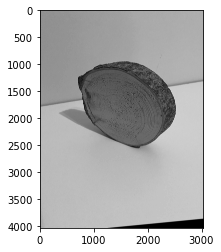

In [12]:
F,inlier1,inlier2 = getData(img1,img2)
out1,out2 = imgRect(img1,img2,inlier1,inlier2,F,(img1.shape[1],img1.shape[0]))
plt.imshow(out2,cmap='gray')

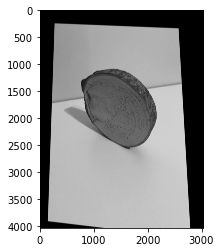

In [13]:
plt.imshow(out1,cmap='gray')

numDisparities = 16
blockSize = 5


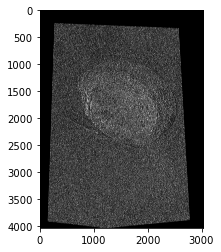

In [14]:
nm = 1
b=0
print("numDisparities = "+str(nm*16))
print("blockSize = "+ str(5+(2*b)))
disp = calcDispMap(out1,out2,16*nm,5+(2*b))
plt.imshow(disp,cmap='gray')

Text(0.5, 1.0, 'img l')

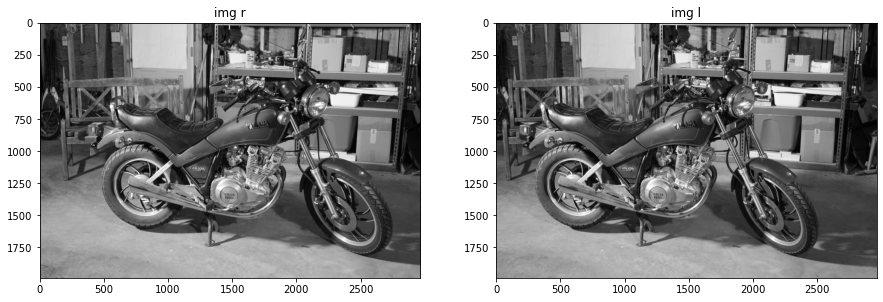

In [20]:
img1 = cv.imread("bike_l.png")
img2 = cv.imread("bike_r.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("img r")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("img l")

(2964, 1988)


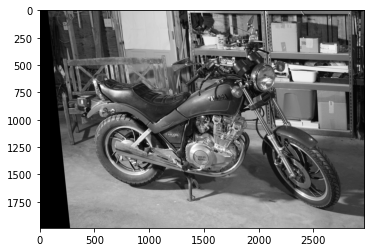

In [21]:
F,inlier1,inlier2 = getData(img1,img2)
out1,out2 = imgRect(img1,img2,inlier1,inlier2,F,(img1.shape[1],img1.shape[0]))
plt.imshow(out2,cmap='gray')

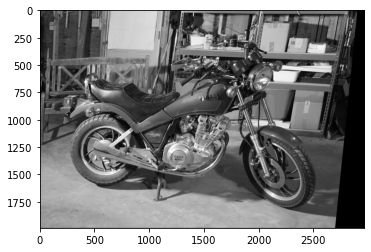

In [22]:
plt.imshow(out1,cmap='gray')

numDisparities = 48
blockSize = 5


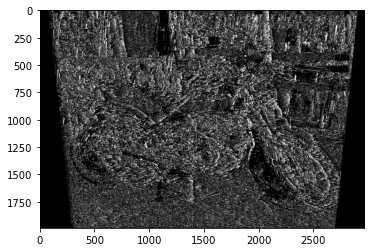

In [35]:
nm = 3
b=0
print("numDisparities = "+str(nm*16))
print("blockSize = "+ str(5+(2*b)))
disp = calcDispMap(out1,out2,16*nm,5+(2*b))
plt.imshow(disp,cmap='gray')